In [7]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# 避免画图时无法显示中文（中文部分以正方格显示）
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

# 显示所有的列，而不是以……显示
pd.set_option('display.max_columns', None)
# 显示所有的行，而不是以……显示
pd.set_option('display.max_rows', None)
# 不自动换行显示
pd.set_option('display.width', None)

In [9]:
# 读取文件
catering_sale=pd.read_excel('./data/catering_sale.xls')
# 判断是否存在缺失值
print(catering_sale.info(),'\n')
# print(np.isnan(catering_sale).any(),'\n')
catering_sale2=catering_sale.dropna(axis=0)
print(catering_sale2.info(),'\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   日期      201 non-null    datetime64[ns]
 1   销量      200 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.3 KB
None 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 200
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   日期      200 non-null    datetime64[ns]
 1   销量      200 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.7 KB
None 



In [11]:
# 数据特征分析
y=catering_sale2.iloc[:,1]
print(catering_sale2.describe(),'\n')
m=stats.mode(y)
r=np.max(y)-np.min(y)
cv=np.std(y)/np.mean(y)
n,(smin,smax),sm,sv,ss,sk=stats.describe(y)
print(f"统计量：{n}，最小值：{smin}，最大值：{smax}，极差：{r}，众数：{m}，均值：{sm}，方差：{sv}，偏度：{ss}，峰度：{sk}，变异系数：{cv}\n")

                销量
count   200.000000
mean   2755.214700
std     751.029772
min      22.000000
25%    2451.975000
50%    2655.850000
75%    3026.125000
max    9106.440000 

统计量：200，最小值：22.0，最大值：9106.44，极差：9084.44，众数：ModeResult(mode=array([2618.2]), count=array([2]))，均值：2755.2146999999995，方差：564045.7182129748，偏度：3.0384935298149753，峰度：29.36759633770712，变异系数：0.27190252889249317



C:\Windows\Temp\ipykernel_10824\788993650.py:4: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  m=stats.mode(y)


# 正态分布3Sigma原则

In [27]:
# KS检验
def KsNormDetect(df):   # 输出结果是服从正态分布的数据列的名字
    from scipy.stats import kstest 
    list_norm_T = []   # 用来储存服从正态分布的数据列的名字
    for col in df.columns:
        u = df[col].mean()               # 计算均值
        std = df[col].std()              # 计算标准差
        res=kstest(df[col], 'norm', (u, std))[1]  # 计算P值
        if res<=0.05:                        # 判断p值是否服从正态分布，p<=0.05 则服从正态分布，否则不服从
            print(f'{col}该列数据服从正态分布------')
            print('均值为：%.3f，标准差为：%.3f' % (u, std))
            print('-'*40)
            list_norm_T.append(col)             
        else:                                # 这一段实际上没什么必要
            print(f'!!!{col}该列数据不服从正态分布**********')
            print('均值为：%.3f，标准差为：%.3f' % (u, std))
            print('*'*40)
    return list_norm_T

In [28]:
# 对待处理数据中心服从正态分布的数据列
def three_sigma(Ser1):  # Ser1：表示传入DataFrame的某一列
    rule = []
    rule = (Ser1.mean()-3*Ser1.std()>Ser1) | (Ser1.mean()+3*Ser1.std()< Ser1)
    out = Ser1.index[rule]
    return out          # 返回落在3sigma之外的行索引值
 
def delete_out3sigma(data, list_norm):  # data：待检测的DataFrame；list_norm：服从正态分布的数据列名 
    out_index = []                      # 保存要删除的行索引
    for col in list_norm:            # 对每一列分别用3sigma原则处理
        index = three_sigma(data[col])
        out_index += index.tolist()
    delete_ = list(set(out_index))  # 去除 out_index 中的重复元素
    print(f'\n所删除的行索引共计{len(delete_)}个：\n',delete_)
    data.drop(delete_,inplace=True) # 根据 delete_ 删除对应行的数据
    return data

In [29]:
if __name__ == '__main__':
    # 创建数据
    data = [1222, 87, 77, 92, 68, 80, 78, 84, 77, 81, 80, 80, 77, 92, 86, 76, 80, 81, 75, 77, 72, 81, 72, 84, 86, 80,
            68, 77, 87, 76, 77, 78, 92, 75, 80, 78, 123, 3, 1223, 1232]
    df = pd.DataFrame(data, columns=['value'])
    ks_res=KsNormDetect(df)
    result=delete_out3sigma(df, ks_res)
    print(result)

value该列数据服从正态分布------
均值为：164.850，标准差为：306.289
----------------------------------------

所删除的行索引共计3个：
 [0, 38, 39]
    value
1      87
2      77
3      92
4      68
5      80
6      78
7      84
8      77
9      81
10     80
11     80
12     77
13     92
14     86
15     76
16     80
17     81
18     75
19     77
20     72
21     81
22     72
23     84
24     86
25     80
26     68
27     77
28     87
29     76
30     77
31     78
32     92
33     75
34     80
35     78
36    123
37      3


# 箱形图数据预处理

In [16]:
# 画箱线图
y=np.array(y)
def boxplot(y,title):
    plt.style.use('ggplot')
    plt.subplots()
    plt.boxplot(y,patch_artist=True,showmeans=True,showfliers=True,medianprops={'color':'yellow'},flierprops={'markerfacecolor':'red'},labels=[''])
    plt.xlabel('销量')
    plt.text(1.05,3850,'上边缘')
    plt.text(1.05,1780,'下边缘')
    plt.text(1.1,3000,'上四分位数Q3')
    plt.text(0.8,2600,'中位数Q2')
    plt.text(1.1,2300,'下四分位数Q1')
    plt.title(f'{title}箱线图')
    plt.show()

# 计算上下四分位数
q1=np.quantile(y,q=0.25)
q3=np.quantile(y,q=0.75)
# 异常值判断标准，1.5倍的四分位差 计算上下须对应的值
low_quantile=q1-1.5*(q3-q1)
high_quantile=q3+1.5*(q3-q1)
print(f'下四分位数Q1：{q1}，上四分位数Q3：{q3}，下边缘：{low_quantile}，上边缘：{high_quantile}\n')

y2=[]
for i in y:
    if i>high_quantile:
        i=high_quantile
        y2.append(i)
    elif i<low_quantile:
        i=low_quantile
        y2.append(i)
    else:
        y2.append(i)

下四分位数Q1：2451.975，上四分位数Q3：3026.125，下边缘：1590.7499999999998，上边缘：3887.3500000000004



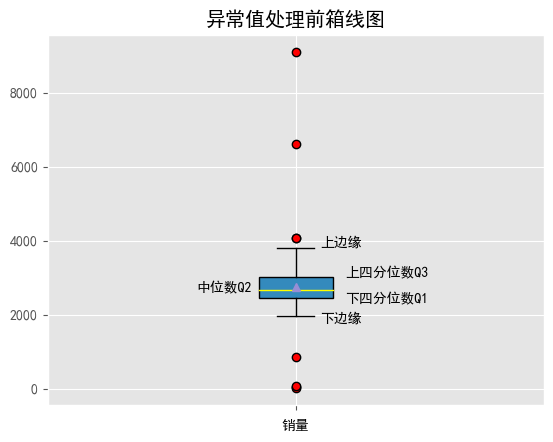

In [17]:
boxplot(y,title='异常值处理前')

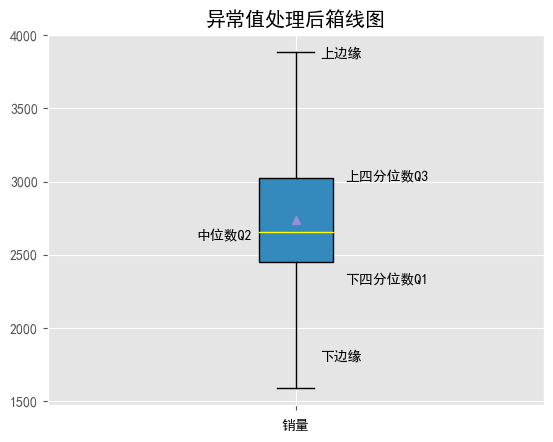

In [18]:
boxplot(y2,title='异常值处理后')

In [19]:
# 标准化处理
catering_sale_all=pd.read_excel('./data/catering_sale_all.xls',index_col=0)
# 方法一：归一化处理
normalization_data1=MinMaxScaler().fit_transform(catering_sale_all)
normalization_data1=[[round(j,2) for j in normalization_data1[i]] for i in range(len(normalization_data1))]
normalization_data1=np.array(normalization_data1)
# 方法二：标准化处理
normalization_data2=StandardScaler().fit_transform(catering_sale_all)
normalization_data2=[[round(j,2) for j in normalization_data2[i]] for i in range(len(normalization_data2))]
normalization_data2=np.array(normalization_data2)
print(f'方法一：归一化处理：\n{normalization_data1}\n方法二：标准化处理：\n{normalization_data2}')

方法一：归一化处理：
[[1.   0.1  0.4  1.   0.9  0.83 0.94 0.45 0.64 1.  ]
 [0.57 1.   1.   0.48 0.5  0.58 1.   0.73 1.   0.39]
 [0.5  0.3  0.8  0.48 0.4  0.   0.33 0.55 0.64 0.22]
 [0.43 0.1  0.2  0.   0.6  0.5  0.44 0.73 1.   0.39]
 [0.07 0.5  0.9  0.24 0.8  0.58 0.89 0.55 0.91 0.43]
 [0.71 0.5  0.9  0.62 0.4  0.5  0.61 0.55 0.18 0.22]
 [0.43 0.2  0.9  0.24 0.1  0.33 0.5  0.27 0.64 0.13]
 [0.43 0.7  0.9  0.14 0.3  0.42 0.28 0.64 0.73 0.04]
 [0.21 0.3  0.4  0.   0.1  0.08 0.22 0.   0.36 0.26]
 [0.43 0.6  0.9  0.14 0.4  0.33 0.28 0.36 0.45 0.22]
 [0.21 0.2  0.4  0.29 0.   0.33 0.39 0.   0.   0.26]
 [0.14 0.4  0.   0.19 0.4  0.5  0.78 0.36 0.91 0.22]
 [0.43 0.2  0.7  0.29 0.7  0.42 0.72 0.36 0.55 0.48]
 [0.5  0.3  0.6  0.14 1.   0.83 0.83 0.36 0.09 0.43]
 [0.71 0.7  0.8  0.33 0.5  0.67 0.39 0.64 0.55 0.48]
 [0.07 0.3  0.8  0.38 0.5  0.33 0.5  0.09 0.73 0.3 ]
 [0.21 0.7  0.6  0.29 0.7  0.08 0.39 0.82 0.27 0.39]
 [0.43 1.   0.   0.43 0.3  0.5  0.   0.   0.82 0.17]
 [0.   0.5  0.9  0.48 0.9  0.42 0.6

相关性矩阵：
            百合酱蒸凤爪    翡翠蒸香茜饺   金银蒜汁蒸排骨     乐膳真味鸡     蜜汁焗餐包      生炒菜心    铁板酸菜豆腐  \
百合酱蒸凤爪   1.000000  0.009206  0.016799  0.455638  0.126700  0.308496  0.204898   
翡翠蒸香茜饺   0.009206  1.000000  0.304434 -0.012279  0.066560 -0.180446 -0.026908   
金银蒜汁蒸排骨  0.016799  0.304434  1.000000  0.035135  0.122710 -0.184290  0.187272   
乐膳真味鸡    0.455638 -0.012279  0.035135  1.000000  0.089602  0.325462  0.297692   
蜜汁焗餐包    0.126700  0.066560  0.122710  0.089602  1.000000  0.361068  0.528772   
生炒菜心     0.308496 -0.180446 -0.184290  0.325462  0.361068  1.000000  0.369787   
铁板酸菜豆腐   0.204898 -0.026908  0.187272  0.297692  0.528772  0.369787  1.000000   
香煎韭菜饺    0.127448  0.062344  0.121543 -0.068866  0.219578  0.038233  0.095543   
香煎罗卜糕   -0.090276  0.270276  0.077808 -0.030222  0.200550  0.049898  0.157958   
原汁原味菜心   0.428316  0.020462  0.029074  0.421878  0.516849  0.122988  0.567332   

            香煎韭菜饺     香煎罗卜糕    原汁原味菜心  
百合酱蒸凤爪   0.127448 -0.090276  0.428316  
翡翠蒸香茜饺   0.062344  0

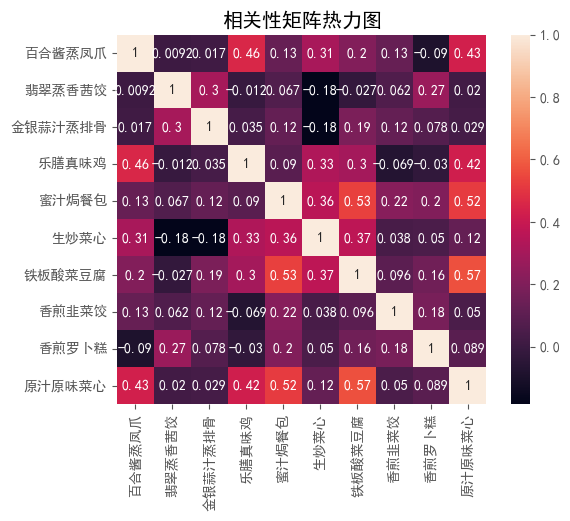

In [20]:
# 相关性分析
pearson=catering_sale_all.corr(method='pearson')
print('相关性矩阵：\n',pearson)
y2=catering_sale_all.iloc[:,1:]
# 相关性矩阵散点图
# sns.pairplot(y2,kind='reg',diag_kind='hist')
# plt.title('相关性矩阵散点图')
# plt.show()
# 相关性矩阵热力图
sns.heatmap(pearson,square=True,annot=True)
plt.title('相关性矩阵热力图')
plt.show()